In [245]:
# Import the necessary Python libraries for Machine learning

# For Anlaysis and numerical functions
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns # Optional for better styling


import warnings
warnings.filterwarnings('ignore')

In [246]:
# Read the given bike sharing system data and loading into the dataframe df
df = pd.read_csv(r'C:\Users\vwarke\OneDrive - Microsoft\Desktop\day.csv')

In [247]:
# Display the first 5 rows of the DataFrame
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [248]:
df.shape

(730, 16)

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:

    1. instant: This represents the record index or the hour of the observation.
	2. dteday: The date of the observation (in YYYY-MM-DD format).
	3. season: Indicates the season (1 = spring, 2 = summer, 3 = fall, 4 = winter).
	4. yr: Year (0 = 2011, 1 = 2012).
	5. mnth: Month (1 to 12).
	6. holiday: Binary flag (1 if it’s a holiday, 0 otherwise).
	7. weekday: Day of the week (0 = Sunday, 1 = Monday, …, 6 = Saturday).
	8. workingday: Binary flag (1 if it’s a working day, 0 otherwise).
	9. weathersit: Weather situation (1 = clear, 2 = mist/cloudy, 3 = light snow/rain, 4 = heavy rain/snow).
	10. temp: Normalized temperature (0 to 1).
	11. atemp: Normalized “feels like” temperature (0 to 1).
	12. hum: Normalized humidity (0 to 1).
	13. windspeed: Normalized wind speed (0 to 1).
	14. casual: Count of casual (non-registered) bike rentals.
	15. registered: Count of registered bike rentals.
	16. cnt: Total count of bike rentals (sum of casual and registered).


In [250]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
#Checking for NULL/MISSING values

In [251]:

# percentage of missing values in each column
round(100*(df.isnull().sum()/len(df)), 2).sort_values(ascending=False)
#There are no missing / Null values either in columns or rows
#There is no missing values in this dataset. but if there would have been any missing valuses then we have to impute that.


instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [252]:
# percentage of missing values in each row
round((df.isnull().sum(axis=1)/len(df))*100,2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

In [253]:
#### Checking for duplicate values

df_dup = df.copy()

# Checking for duplicates and dropping the entire duplicate row if any
df_dup.drop_duplicates(subset=None, inplace=True)
df_dup.shape

(730, 16)

In [254]:
df.shape

(730, 16)

In [ ]:
#Removing redundant & unwanted columns

# By looking at dataset, below are the variables that can be removed from further analysis as they not required as per analysis requirement.
#      instant: Since it’s only an index value, excluding it won’t impact your analysis.
#      dteday: Given that you already have separate columns for ‘year’ and ‘month,’ removing the ‘dteday’ column makes sense.
#      casual and registered: These columns represent bike counts by different customer categories. Since your objective is to find the total count of bikes (regardless of category), excluding them is appropriate. Additionally, creating a new variable for the customer type ratio is a good approach.
# We will use to save the modified dataframe as ‘df_new’ to preserve the original dataset for future analysis or validation.


In [255]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [256]:
df_new=df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [257]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [ ]:
# ...............Visualising the Data.........................

#Numeric Columns  -'cnt', 'temp', 'atemp', 'hum','windspeed'
#Categorical Columns  -'season','yr','holiday','weekday','workingday','weathersit','mnth'

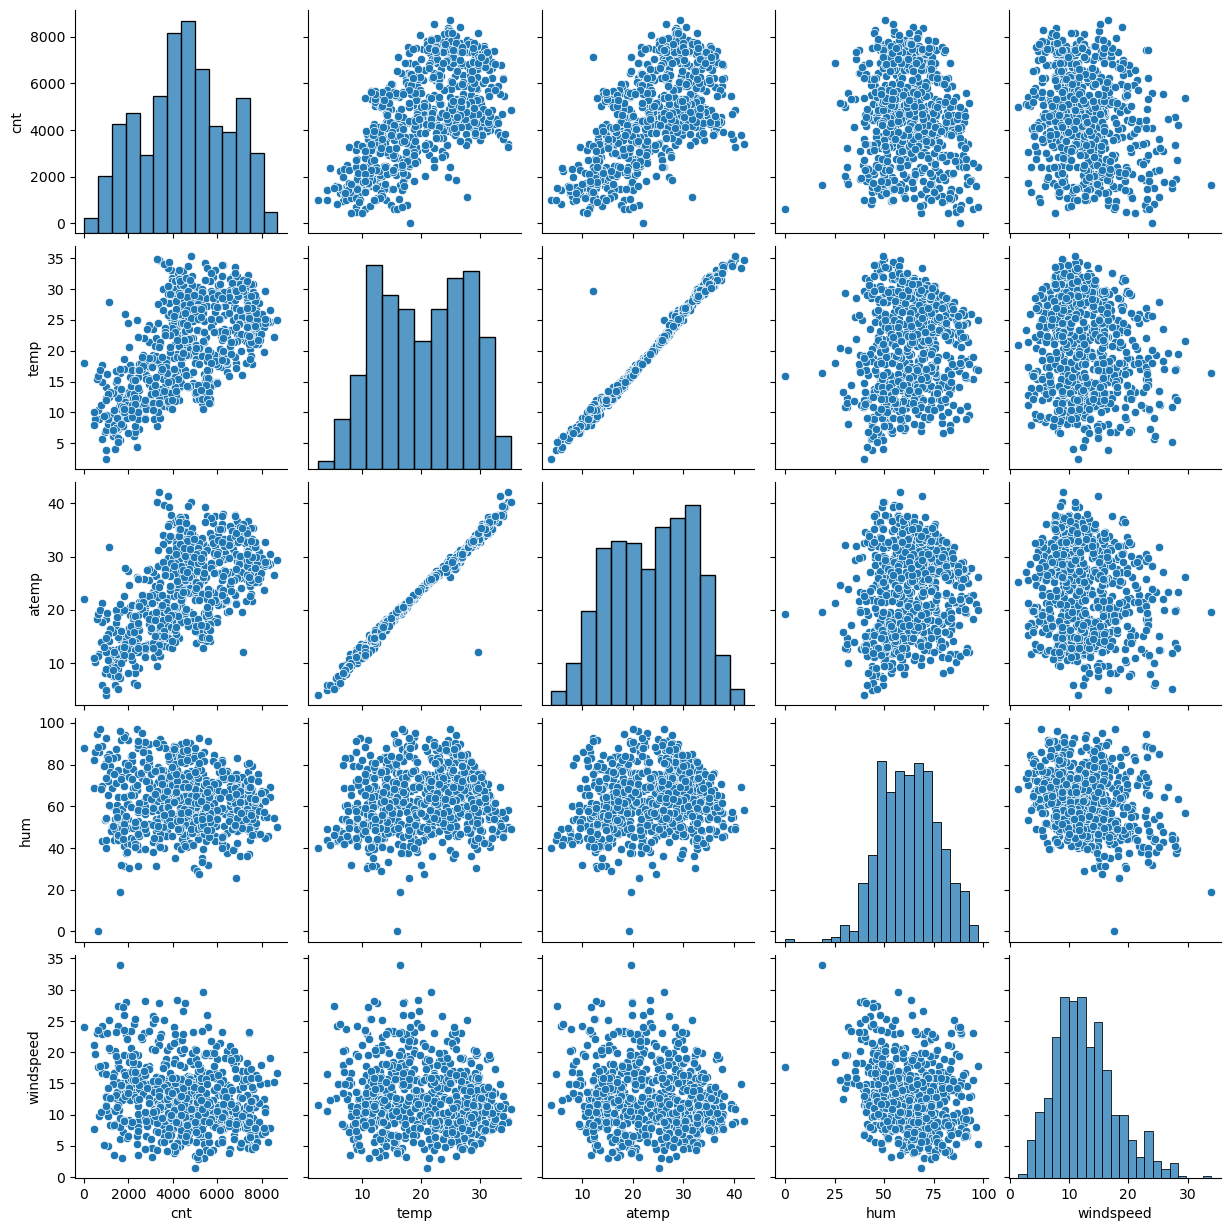

In [258]:
#Visualising the Data : We'll visualise the numerical data using matplotlib and seaborn.
#Numeric Columns  -'cnt', 'temp', 'atemp', 'hum','windspeed'
sns.pairplot(data = df_new, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

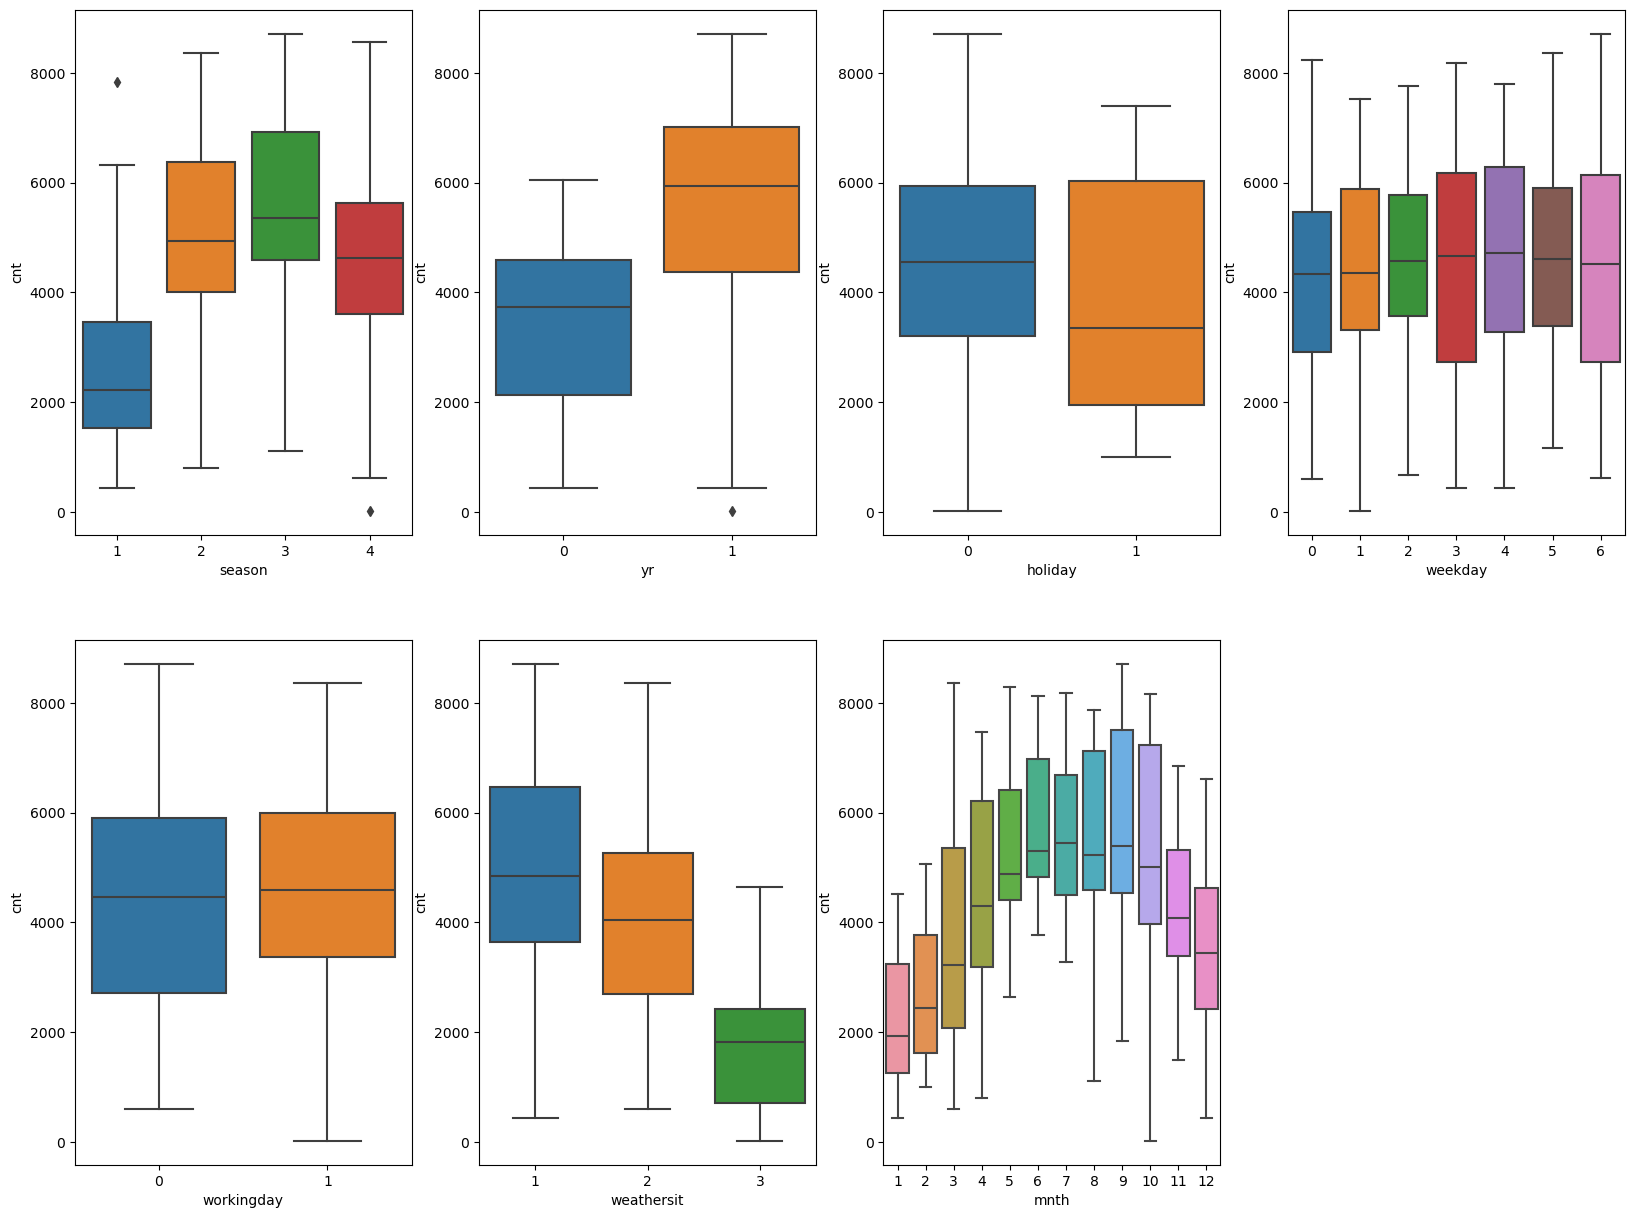

In [259]:
#Visualising the Data : We'll visualise the Categorical data using Boxplot
#Categorical Columns  -'season','yr','holiday','weekday','workingday','weathersit','mnth'

plt.figure(figsize=(20, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_new)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df_new)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_new)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_new)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_new)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_new)
plt.subplot(2,4,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_new)
plt.show()

In [ ]:
#Mapping the categorical values to their respective categorical string values (using data dictionary)
#The process involves associating categorical values with their corresponding string representations using the provided data dictionary. This ensures that each category is correctly labeled and interpretable.

In [262]:
import calendar
df_new['mnth'] = _new['mnth'].apply(lambda x: calendar.month_abbr[x])

NameError: name '_new' is not defined

In [263]:
# Maping seasons
#df_new.season = df_new.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})
df_new.season = df_new.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [264]:
# Mapping weathersit
df_new.weathersit = df_new.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [265]:
#Mapping Weekday
df_new.weekday = df_new.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [266]:
# Check the dataframe now
df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,1,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [ ]:
#Creating Dummy Variables
#We will create DUMMY variables for these 4 categorical variables namely - mnth, weekday, season & weathersit.

In [267]:
# Get the dummy variables for the features season','mnth','weekday','weathersit'' and store it in a new variable - 'dummy'
#dummy = df_new[['season','mnth','weekday','weathersit']]
dummy = df_new[['season','mnth','weekday','weathersit']]

In [268]:
dummy = pd.get_dummies(dummy,drop_first=True )

In [269]:
df_new = pd.concat([dummy,df_new],axis = 1)

In [270]:
df_new.head()

,mnth,season_Spring,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,True,False,False,False,True,False,False,False,False,...,1,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,True,False,False,False,False,True,False,False,False,...,1,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,True,False,False,True,False,False,False,False,False,...,1,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,True,False,False,False,False,False,False,True,False,...,1,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,True,False,False,False,False,False,False,False,True,...,1,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [271]:
#Deleting the orginal columns season.weathersit,weekday,mnth
df_new.drop(['season'],axis=1,inplace=True)
df_new.drop(['weathersit'],axis=1,inplace=True)

df_new.drop(['weekday'],axis=1,inplace=True)

df_new.drop(['mnth'],axis=1,inplace=True)


df_new.head()

,season_Spring,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,True,False,False,False,True,False,False,False,False,False,True,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,True,False,False,False,False,True,False,False,False,False,True,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,True,False,False,True,False,False,False,False,False,False,False,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,True,False,False,False,False,False,False,True,False,False,False,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,True,False,False,False,False,False,False,False,True,False,False,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [272]:
df_new.head()

,season_Spring,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,True,False,False,False,True,False,False,False,False,False,True,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,True,False,False,False,False,True,False,False,False,False,True,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,True,False,False,True,False,False,False,False,False,False,False,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,True,False,False,False,False,False,False,True,False,False,False,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,True,False,False,False,False,False,False,False,True,False,False,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [229]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 45.8 KB


In [273]:
#Splitting the Data into Training and Testing Sets

from sklearn.model_selection import train_test_split

train, test = train_test_split(df_new, train_size = 0.7, test_size = 0.3, random_state = 100)

In [274]:
test.shape

(219, 19)

In [275]:
train.shape

(510, 19)

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 52 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 510 non-null    bool   
 1   season_Summer                 510 non-null    bool   
 2   season_Winter                 510 non-null    bool   
 3   season_Spring                 510 non-null    bool   
 4   season_Summer                 510 non-null    bool   
 5   season_Winter                 510 non-null    bool   
 6   mnth_Aug                      510 non-null    bool   
 7   mnth_Dec                      510 non-null    bool   
 8   mnth_Feb                      510 non-null    bool   
 9   mnth_Jan                      510 non-null    bool   
 10  mnth_Jul                      510 non-null    bool   
 11  mnth_Jun                      510 non-null    bool   
 12  mnth_Mar                      510 non-null    bool   
 13  mnth_May 

In [ ]:
#Rescaling the Features

In [276]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [277]:
# Apply scaler() to all the columns except the 'dummy' variables.
num_vars = ['cnt','hum','windspeed','temp','atemp']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [278]:
train.head()

,season_Spring,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,False,False,True,False,False,False,False,True,False,False,False,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,False,False,False,False,False,False,False,True,False,False,False,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,True,False,False,False,True,False,False,False,False,False,True,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,True,False,False,False,False,True,False,False,False,False,False,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,False,True,False,False,True,False,False,False,False,False,True,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [279]:
train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Dividing into X and Y sets for the model building

In [280]:
y_train = train.pop('cnt')
X_train = train

In [281]:
y_train.shape

(510,)

In [ ]:
#Building a linear model

In [282]:
#Feature Selection
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [283]:

# Assuming X_train and y_train are already defined

# Create a Linear Regression model
lm = LinearRegression()


# Initialize RFE with 15 features
rfe = RFE(estimator=lm, n_features_to_select=15)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

# Print the selected features
selected_features = X_train.columns[rfe.support_]
print(f"Selected features: {selected_features}")



Selected features: Index(['season_Spring', 'season_Summer', 'season_Winter', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'holiday', 'workingday', 'temp',
       'atemp', 'hum', 'windspeed'],
      dtype='object')


In [284]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('weekday_Monday', True, 1),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thrusday', False, 3),
 ('weekday_Tuesday', False, 2),
 ('weekday_Wednesday', False, 4),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [285]:
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'holiday', 'workingday', 'temp',
       'atemp', 'hum', 'windspeed'],
      dtype='object')

In [286]:
X_train.columns[~rfe.support_]

Index(['weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday'], dtype='object')

In [ ]:
#Building model using statsmodel, for the detailed statistics


In [287]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [176]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [178]:
X_train_rfe.head()

,const,season_Spring,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_May,mnth_Nov,mnth_Sep,weekday_Saturday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr
653,1.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,1
576,1.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,1
426,1.0,True,False,False,False,False,False,False,False,False,False,False,True,False,True,1
728,1.0,True,False,False,True,False,False,False,False,False,False,False,False,False,False,1
482,1.0,False,False,False,False,False,False,False,False,False,False,False,True,False,True,1


In [ ]:
#Running the linear model
lm_1 = sm.OLS(y_train,X_train_rfe).fit()